# k-means Clustering

## Table of contents

[1.) Simple k-means clustering example](#section_1)<br>
[2.) Image segmentation](#section_2)<br>
[3.) 3D point cloud segmentation](#section_3)<br>
[4.) Finding clusters in the apartment data](#section_4)

## Libraries and settings

In [1]:
# Install opencv-python-headless (neccessary in GitHub Codespaces)
!pip install --upgrade pip
!pip install opencv-python-headless

# Libraries
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Current working directory
print('\nCurrent working directory:', os.getcwd())

Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable

Current working directory: /workspaces/data_analytics/Week_10


## 1.) Simple k-means clustering example
<a id='section_1'></a>

### Create the dataset

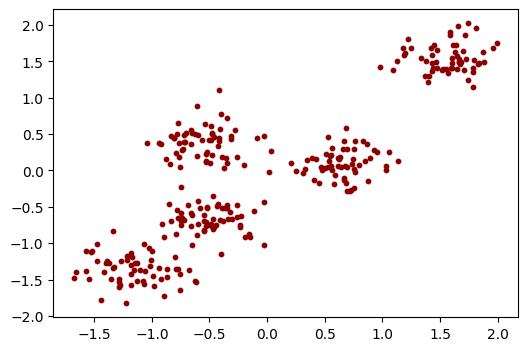

In [2]:
# Create data
centers = [[2,1], [-2,2], [-2,-2], [-4,-5], [5,7]]
X, y = make_blobs(n_samples=300, 
                  centers=centers, 
                  cluster_std=0.8,
                  random_state=42)

# Normalization of the values
X = StandardScaler().fit_transform(X)

# Plot the data
plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1], s=10, color='darkred')
plt.show()

### Elbow Method showing the optimal k

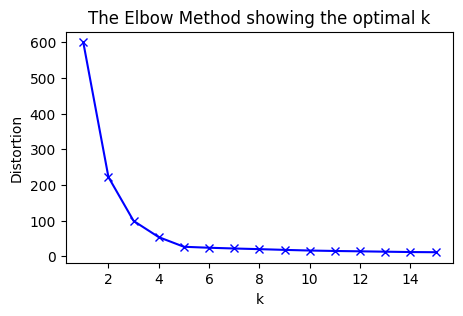

In [3]:
# Sum of squared distances of samples to their closest cluster center
distortions = []

# Range of k's
K = range(1,16,1)

# Loop to find the optimal k
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
    
# Elbow plot
plt.figure(figsize=(5,3))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

plt.show()

Task 1 b)
The optimal value of k using the elbow method is typically the point at which the rate of decrease sharply changes, indicating that additional clusters do not explain much more of the variance in the data. In this case, k should be 5.

### Perform k-means clustering

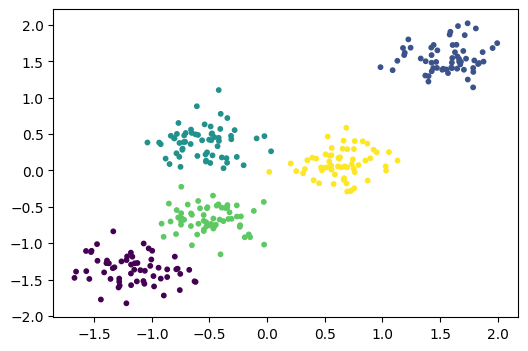

In [4]:
# Number of clusters
k = 5

# k-means clustering
kmeans = KMeans(n_clusters=k, random_state=42).fit(X)

# Predict the values
y2 = kmeans.predict(X)

# Plot the clusters
plt.figure(figsize=(6,4))
plt.scatter(X[:, 0], X[:, 1], c=y2, s=10)
plt.show()

### Get and check the converged cluster centroids

In [5]:
# Print centroids
centroids = kmeans.cluster_centers_
print('Cluster centroids:')
print(centroids, '\n')

# Check the 1st cluster's centroid 'by hand'
clust_00 = X[y2 == 0]
print('The 1st cluster\'s centroid:')
print(f'x = {sum(clust_00[:,0]/len(clust_00[:,0])):.8f}')
print(f'y = {sum(clust_00[:,1]/len(clust_00[:,1])):.8f}')

Cluster centroids:
[[-1.16214999 -1.36217282]
 [ 1.56276666  1.54186443]
 [-0.55467879  0.3889481 ]
 [-0.49867406 -0.67040574]
 [ 0.64167824  0.09023659]] 

The 1st cluster's centroid:
x = -1.16214999
y = -1.36217282


### Get the inertia or 'within-cluster sum-of-squares (WCSS)' of the k-means model

In [6]:
print(f'Within-cluster sum-of-squares: {kmeans.inertia_:.4f}')

Within-cluster sum-of-squares: 26.3487


### Perform Silhouette Analysis
- For examples see:
- https://laid-back-scientist.com/en/k-means
- https://machinelearninggeek.com/evaluating-clustering-methods
- https://medium.com/@favourphilic/how-to-interpret-silhouette-plot-for-k-means-clustering-414e144a17fe

k=2, Silhouette Score: 0.5325


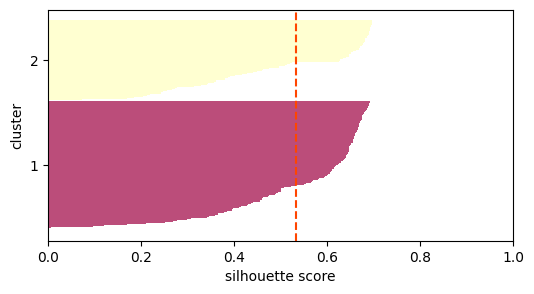

k=3, Silhouette Score: 0.5659


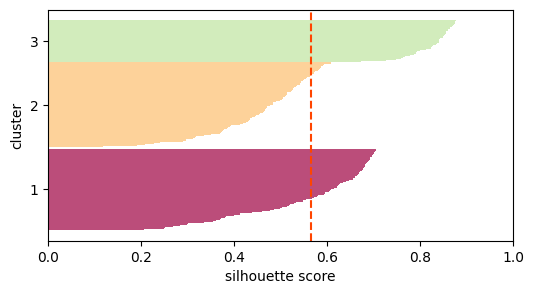

In [7]:
# Import own module for Silhouette plots
from silhouette import *

# Create Silhouette plots for different k's
# Note: range(2,12,1) provides: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
for i in [2,3]:
    model = KMeans(n_clusters=i, 
                   random_state=42, 
                   init='random')
    model.fit(X)
    print(f'k={i}, Silhouette Score: {silhouette_score(X, model.labels_):.4f}')
    plt.figure(figsize=(6,3))
    show_silhouette(X=X, fitted_model=model)

In [8]:
#Task 1 c)
from sklearn.metrics import silhouette_score
from silhouette import show_silhouette # Assuming this is a custom function you've written or imported from somewhere else

# Range of k's
K = range(2, 12)

for i in K:
    # Initialize the KMeans model
    model = KMeans(n_clusters=i, random_state=42, init='random')
    # Fit the model
    model.fit(X)
    # Calculate the Silhouette Score
    silhouette_avg = silhouette_score(X, model.labels_)
    print(f'k={i}, Silhouette Score: {silhouette_avg:.4f}')
    
   


k=2, Silhouette Score: 0.5325
k=3, Silhouette Score: 0.5659
k=4, Silhouette Score: 0.6257
k=5, Silhouette Score: 0.6597
k=6, Silhouette Score: 0.6110
k=7, Silhouette Score: 0.5223
k=8, Silhouette Score: 0.4926
k=9, Silhouette Score: 0.4076
k=10, Silhouette Score: 0.4020
k=11, Silhouette Score: 0.3349


## 2.) Image segmentation
<a id='section_2'></a>

### Read the image

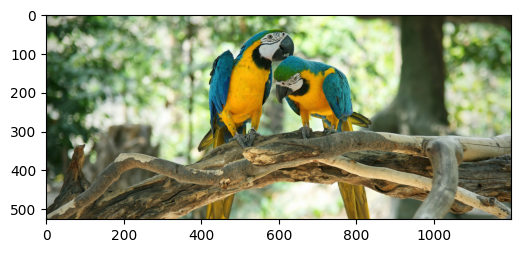

In [9]:
# Read the image
image = cv2.imread('parrot.jpg')
 
# Change the color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot the image
plt.figure(figsize=(6,8))
plt.imshow(image)

### Reshape the image

In [10]:
# Reshaping the image into a 2D array of pixels and RGB colors
pixel_vals = image.reshape((-1,3))
 
# Convert to float
pixel_vals = np.float32(pixel_vals)
pixel_vals

array([[ 37.,  68.,  37.],
       [ 37.,  70.,  39.],
       [ 43.,  76.,  45.],
       ...,
       [102., 112., 113.],
       [102., 114., 114.],
       [102., 114., 114.]], dtype=float32)

### Elbow method showing the optimal k

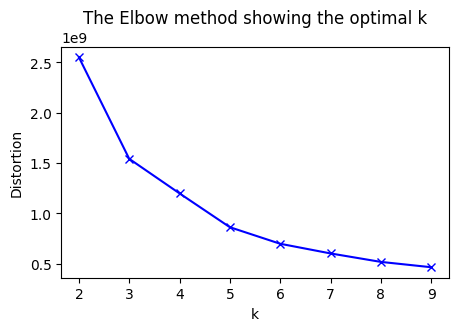

In [11]:
# Sum of squared distances of samples to their closest cluster center
distortions = []

# Range of k's
K = range(2,10,1)

# Loop to find the optimal k
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(pixel_vals)
    distortions.append(kmeanModel.inertia_)
    
# Elbow plot
plt.figure(figsize=(5,3))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow method showing the optimal k')

plt.show()

### Perform image segmentation

In [12]:
# Number of clusters
k = 5

# Criteria for the segmentation algorithm to stop running
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
 
# Perform k-means clustering
retval, labels, centers = cv2.kmeans(pixel_vals, 
                                     k, 
                                     None, 
                                     criteria, 
                                     10, 
                                     cv2.KMEANS_RANDOM_CENTERS)

# Print cluster labels
print('Cluster labels:')
print(labels, '\n')

# Print cluster centroids
print(f'Centroids of {k} clusters')
print(centers)

Cluster labels:
[[2]
 [2]
 [2]
 ...
 [4]
 [4]
 [4]] 

Centroids of 5 clusters
[[161.7978   176.42497  131.57068 ]
 [206.1085   142.65912   10.698247]
 [ 53.6455    63.024746  40.379005]
 [217.82266  229.63536  192.77307 ]
 [104.76609  113.03692   78.56786 ]]


### Change data types and reshape the segmented data for visualization

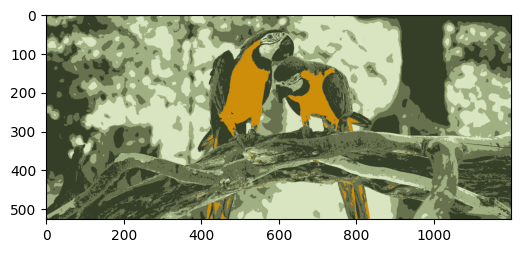

In [13]:
# Convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
 
# Reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))

# Show result
plt.figure(figsize=(6,8))
plt.imshow(segmented_image)

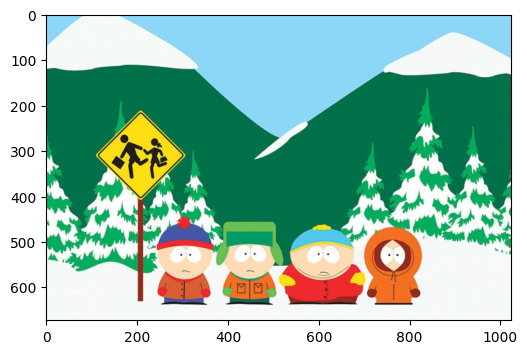

In [14]:
#Task 1 e)
# Read the image
image = cv2.imread('southpark.jpg')
 
# Change the color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot the image
plt.figure(figsize=(6,8))
plt.imshow(image)

In [15]:
# Reshaping the image into a 2D array of pixels and RGB colors
pixel_vals = image.reshape((-1,3))
 
# Convert to float
pixel_vals = np.float32(pixel_vals)
pixel_vals

array([[146., 216., 250.],
       [144., 214., 248.],
       [143., 213., 247.],
       ...,
       [244., 250., 248.],
       [244., 250., 248.],
       [244., 250., 248.]], dtype=float32)

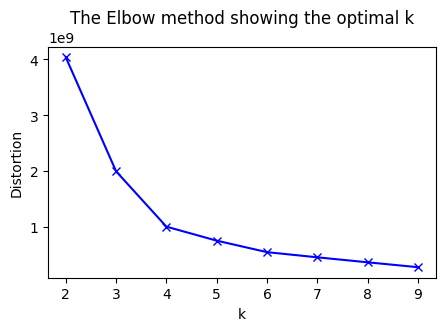

In [16]:
# Sum of squared distances of samples to their closest cluster center
distortions = []

# Range of k's
K = range(2,10,1)

# Loop to find the optimal k
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(pixel_vals)
    distortions.append(kmeanModel.inertia_)
    
# Elbow plot
plt.figure(figsize=(5,3))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow method showing the optimal k')

plt.show()

In [17]:
# Number of clusters
k = 8

# Criteria for the segmentation algorithm to stop running
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
 
# Perform k-means clustering
retval, labels, centers = cv2.kmeans(pixel_vals, 
                                     k, 
                                     None, 
                                     criteria, 
                                     10, 
                                     cv2.KMEANS_RANDOM_CENTERS)

# Print cluster labels
print('Cluster labels:')
print(labels, '\n')

# Print cluster centroids
print(f'Centroids of {k} clusters')
print(centers)

Cluster labels:
[[4]
 [4]
 [4]
 ...
 [2]
 [2]
 [2]] 

Centroids of 8 clusters
[[244.825     221.71954    30.30635  ]
 [ 31.003922  164.41206   100.72774  ]
 [245.97879   249.89111   248.15326  ]
 [245.91331   217.41394   180.69003  ]
 [139.52316   214.90727   242.91162  ]
 [  2.0559232 112.54853    73.47561  ]
 [ 93.93858    41.249203   24.94246  ]
 [229.01154    86.06022    45.118065 ]]


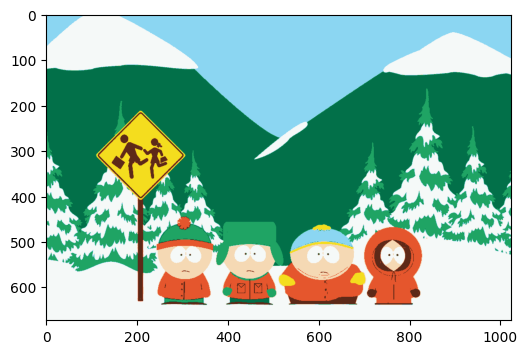

In [18]:
# Convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
 
# Reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))

# Show result
plt.figure(figsize=(6,8))
plt.imshow(segmented_image)

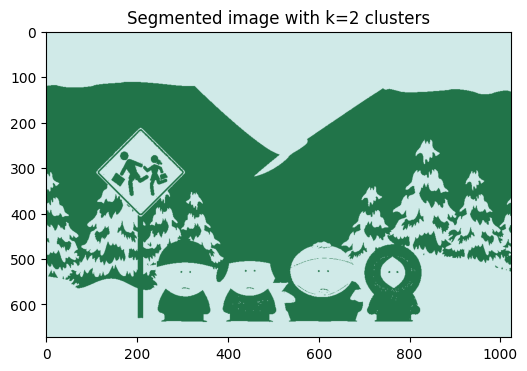

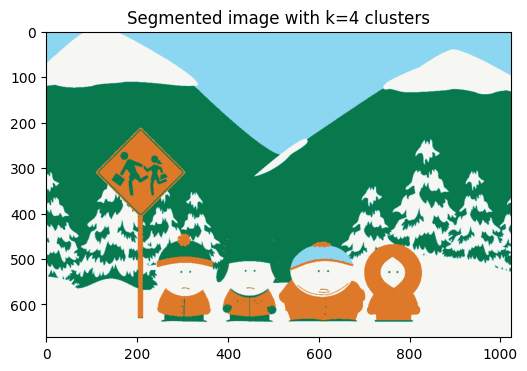

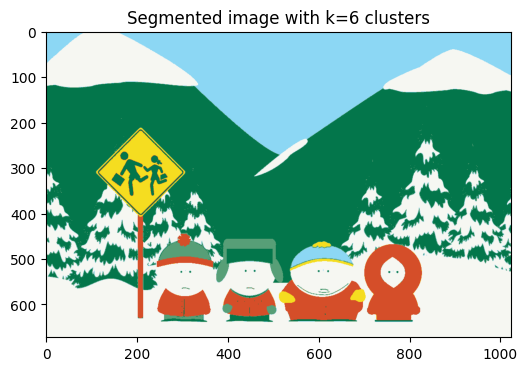

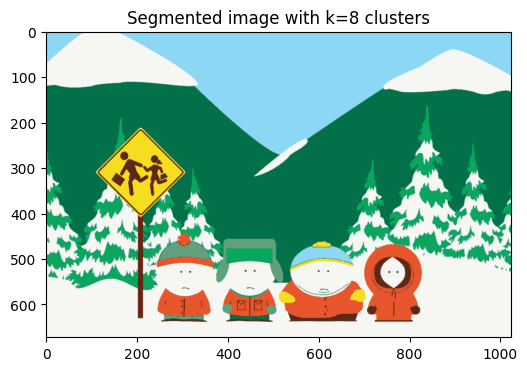

In [19]:
#task 1 f)
def segment_image(image, k):
    # Reshape the image to be a list of pixels
    pixel_vals = image.reshape((-1,3))
    
    # Convert to float type
    pixel_vals = np.float32(pixel_vals)
    
    # Criteria for the segmentation algorithm to stop running
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
    
    # Perform k-means clustering
    retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    # Convert data into 8-bit values
    centers = np.uint8(centers)
    segmented_data = centers[labels.flatten()]
    
    # Reshape data into the original image dimensions
    segmented_image = segmented_data.reshape((image.shape))
    
    # Show result
    plt.figure(figsize=(6,8))
    plt.imshow(segmented_image)
    plt.title(f'Segmented image with k={k} clusters')
    plt.show()

# Assuming 'image' is the image you want to segment loaded via OpenCV
for k_val in [2, 4, 6, 8]:
    segment_image(image, k_val)


## 3.) 3D point cloud segmentation
- For details see: https://towardsdatascience.com/3d-point-cloud-clustering-tutorial-with-k-means-and-python-c870089f3af8
- Data-Viewer: https://app.flyvast.com/flyvast/app/page-snapshot-viewer.html#/444/9b557b91-8f41-16fa-cd2d-3476a1756611
<a id='section_3'></a>

### Import the data (Airport LIDAR point cloud dataset)

In [20]:
# Import the data
data = "KME_planes.xyz"
x, y, z, illuminance, reflectance, intensity, nb_of_returns = np.loadtxt(data,
                                                                         skiprows=1, 
                                                                         delimiter=';', 
                                                                         unpack=True)
# Array with positions of points
pcd = np.column_stack((x,y,z))

# Mean of z-variable (height above ground)
print(np.mean(z).round(4))

# Subset of the point cloud 
mask = (z > np.mean(z)) & (x <= 320) & (x >= 230)
spatial_query = pcd[mask]
spatial_query.shape

5.2829


(9676, 3)

### 3D plot of the point cloud subset

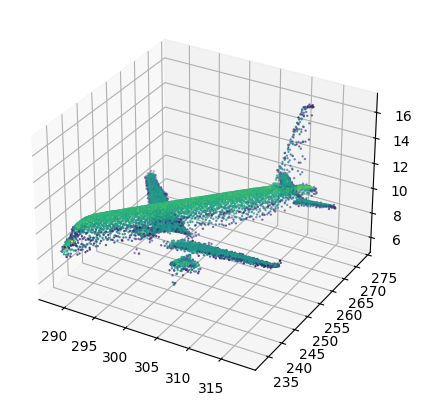

In [21]:
# 3D plot of the subset
plt.figure(figsize=(5,5))
ax = plt.axes(projection ='3d')
ax.scatter(x[mask], y[mask], z[mask], c=intensity[mask], s=0.5)
plt.show()

### 2D plot of the point cloud subset

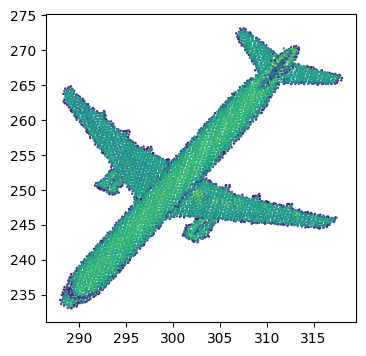

In [22]:
# 2D plot of the subset
plt.figure(figsize=(4,4))
plt.scatter(x[mask], y[mask], c=intensity[mask], s=0.5)
plt.show()

### Elbow method showing the optimal k

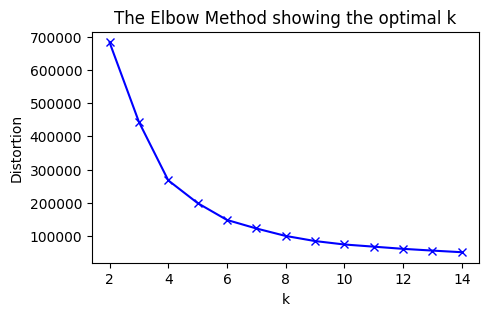

In [23]:
# Sum of squared distances of samples to their closest cluster center
distortions = []

# Range of k's
K = range(2,15,1)

# Loop to find the optimal k
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(spatial_query)
    distortions.append(kmeanModel.inertia_)
    
# Elbow plot
plt.figure(figsize=(5,3))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

plt.show()

### Point cloud segmentation based on k-means clustering

In [24]:
# Define number of clusters
k = 5

# Stack with x,y,z values
X2 = np.column_stack((x[mask], y[mask], z[mask]))

# Perform k-means clustering
kmeans_aerpl = KMeans(n_clusters=k, random_state=42).fit(X2)

### 2D plot of the segmented point cloud

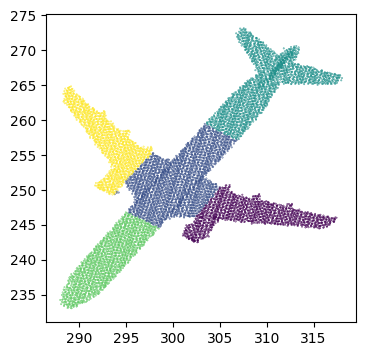

In [25]:
# 2D plot of image segmentation
plt.figure(figsize=(4,4))
plt.scatter(x[mask], y[mask], c=kmeans_aerpl.labels_, s = 0.1)
plt.show()

### 3D plot of the segmented point cloud

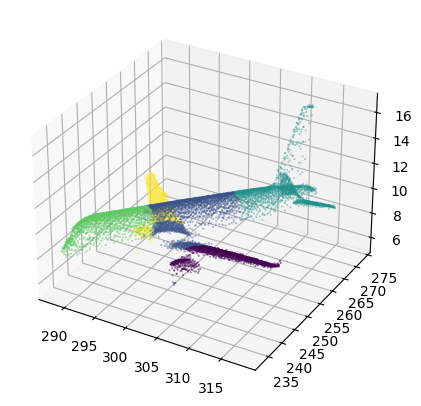

In [26]:
# 3D plot of image segmentation
plt.figure(figsize=(5,5))
ax = plt.axes(projection ='3d')
ax.scatter(x[mask], y[mask], z[mask], c=kmeans_aerpl.labels_, s=0.1)
plt.show()

### Calculate the Silhouette Score

In [27]:
print(f'Silhouette Score: {silhouette_score(X2, kmeans_aerpl.labels_):.4f}')

Silhouette Score: 0.4703


For k=3, Silhouette Score: 0.4404


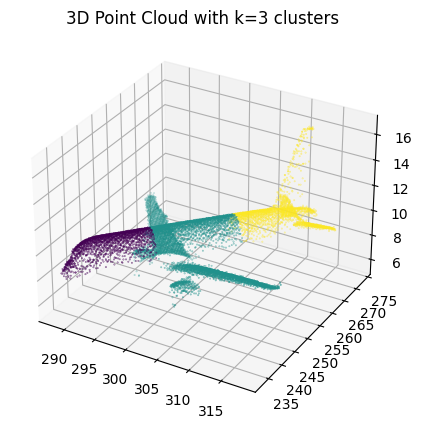

For k=5, Silhouette Score: 0.4703


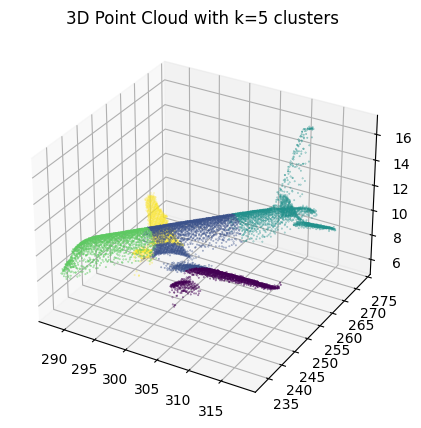

For k=7, Silhouette Score: 0.4668


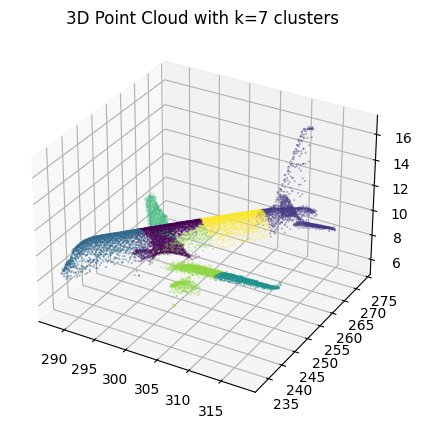

For k=9, Silhouette Score: 0.4591


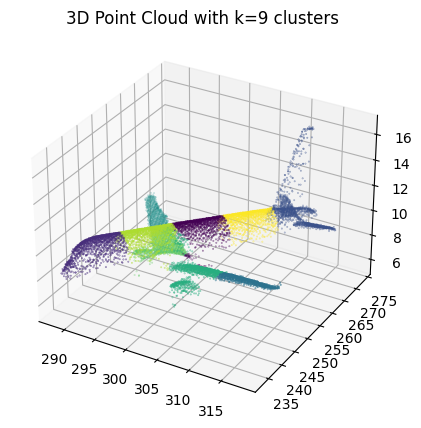

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Import the data
data = "KME_planes.xyz"
x, y, z, illuminance, reflectance, intensity, nb_of_returns = np.loadtxt(data,
                                                                         skiprows=1, 
                                                                         delimiter=';', 
                                                                         unpack=True)

# Array with positions of points
pcd = np.column_stack((x,y,z))

# Mean of z-variable (height above ground)
z_mean = np.mean(z).round(4)

# Subset of the point cloud based on the mask
mask = (z > z_mean) & (x <= 320) & (x >= 230)
spatial_query = pcd[mask]

# Define different k values for clustering
k_values = [3, 5, 7, 9]

# Perform k-means clustering on the subset for different values of k
for k in k_values:
    # Perform k-means clustering
    kmeans_aerpl = KMeans(n_clusters=k, random_state=42).fit(spatial_query)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(spatial_query, kmeans_aerpl.labels_)
    print(f'For k={k}, Silhouette Score: {silhouette_avg:.4f}')
    
    # 3D plot of image segmentation
    plt.figure(figsize=(5,5))
    ax = plt.axes(projection='3d')
    ax.scatter(spatial_query[:, 0], spatial_query[:, 1], spatial_query[:, 2], c=kmeans_aerpl.labels_, s=0.1)
    ax.set_title(f'3D Point Cloud with k={k} clusters')
    plt.show()


Task 1 h)

A higher silhouette score usually indicates that the segmentation is more meaningful, with well-separated clusters.
The silhouette score decreases significantly as k increases, it indicates that having too many clusters is not capturing meaningful distinctions in the data.
By looking at the 3D plots, i can see how the data points are grouped together for different values of k. It gives insights into the natural grouping within the data.
Different values of k highlight different features of the airplanes structure and layout.

## 4.) Finding clusters in the apartment data
<a id='section_4'></a>

### Import the apartment data

In [29]:
# Define columns for import
columns = [ 'web-scraper-order',
            'address_raw',
            'rooms',
            'area',
            'luxurious',
            'price',
            'price_per_m2',
            'lat',
            'lon',
            'bfs_number',
            'bfs_name',
            'pop',
            'pop_dens',
            'frg_pct',
            'emp',
            'mean_taxable_income',
            'dist_supermarket']

# Read and select variables
df_orig = pd.read_csv("apartments_data_enriched_cleaned.csv", sep=";", encoding='utf-8')[columns]

# Rename variable 'web-scraper-order' to 'apmt_id'
df_orig = df_orig.rename(columns={'web-scraper-order': 'id'})

# Remove missing values
df = df_orig.dropna()
df.head(5)

# Remove duplicates
df = df.drop_duplicates()

# Remove some 'extreme' values
df = df.loc[(df['price'] >= 1000) & 
            (df['price'] <= 5000)]

print(df.shape)
df.head(5)

(722, 17)


,id,address_raw,rooms,area,luxurious,price,price_per_m2,lat,lon,bfs_number,bfs_name,pop,pop_dens,frg_pct,emp,mean_taxable_income,dist_supermarket
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",3.0,49,0,1441,29.41,47.252171,8.845797,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,645.652248
1,1693998233-172,"Widacherstrasse 5, 8630 Rüti ZH, ZH",3.0,111,0,2600,23.42,47.252087,8.854919,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,265.102153
2,1693998256-331,"Widenweg 14, 8630 Rüti ZH, ZH",3.0,58,0,1490,25.69,47.253670,8.853993,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,94.401821
3,1693998265-381,"Rain 1, 8630 Rüti ZH, ZH",4.0,118,0,3240,27.46,47.259834,8.851705,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,106.660970
4,1693998276-419,"Bachtelstrasse 24b, 8630 Rüti ZH, ZH",3.0,66,0,1450,21.97,47.266113,8.866872,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,974.844209


### Subset of the apartment data frame for k-means clustering

In [30]:
# Define a subset of the data frame for k-means clustering
X3 = df[['rooms',
         'area',
         'price_per_m2',
         'mean_taxable_income',
         'pop_dens']]

### Elbow method showing the optimal k

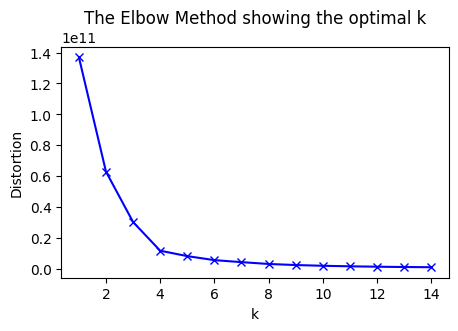

In [31]:
# Sum of squared distances of samples to their closest cluster center
distortions = []

# Range of k's
K = range(1,15)

# Loop to find the optimal k
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X3)
    distortions.append(kmeanModel.inertia_)
    
# Elbow plot
plt.figure(figsize=(5,3))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

plt.show()

### Perform k-means clustering on the apartment data

In [56]:
# Number of clusters
k = 11

# Perform k-means clustering
kmeans_apmts = KMeans(n_clusters=k, random_state=42).fit(X3)

# Add the clusters to data frame
X3['cluster'] = kmeans_apmts.predict(X3)

# Show number of apartments per cluster
X3['cluster'].value_counts().sort_values(ascending=False)

cluster
0     221
8     167
5      95
2      68
9      52
6      47
4      27
3      16
10     13
1       8
7       8
Name: count, dtype: int64

### Plot the apartment clusters

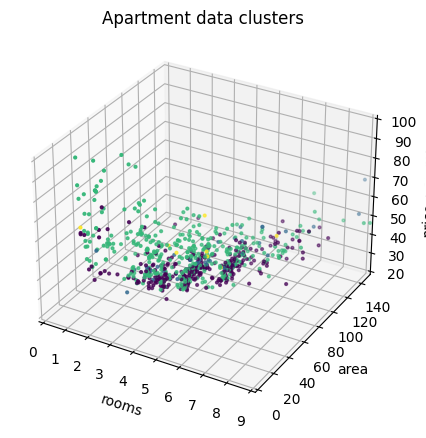

In [37]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['rooms'], df['area'], df['price_per_m2'], c=kmeans_apmts.labels_, s=4)

# Set title and axes labels
ax.set_title('Apartment data clusters', fontsize=12)
ax.set_xlabel('rooms', fontsize=10)
ax.set_ylabel('area', fontsize=10)
ax.set_zlabel('price_per_m2', fontsize=10)

# Set axes range
ax.set_xlim([0,9])
ax.set_ylim([0,150])
ax.set_zlim([20,100])

plt.show()

### Calculate the Silhouette Score

In [57]:
print(f'Silhouette Score: {silhouette_score(X3, kmeans_apmts.labels_):.4f}')

Silhouette Score: 0.7045


In [39]:
#Taks 2 e)
print(kmeans_apmts.labels_, '\n')
print(kmeans_apmts.inertia_, '\n')
print(kmeans_apmts.cluster_centers_, '\n')
print(kmeans_apmts.feature_names_in_)


[0 0 0 0 0 0 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 3 3 2 0 0 0 0 0 0 0 0 0 0 2
 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 2 2 2 2 2 2 2 2 0 0 0 2 2 2 2
 2 2 0 0 0 0 0 1 2 2 1 0 0 3 2 2 2 2 2 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 

Task 2 f)
kmeans_apmts.labels_:
This outputs an array where each element is the cluster label assigned to each observation in the dataset.

kmeans_apmts.inertia_:
This is the sum of squared distances of samples to their closest cluster center. It is a measure of how internally coherent the clusters are. A lower inertia is better and zero is optimal. However, a very low inertia can also be a sign of overfitting if the number of clusters is too large.

kmeans_apmts.cluster_centers_:
This gives the coordinates of the cluster centers. 

kmeans_apmts.feature_names_in_:
Returns an array of feature names if the data given to fit or fit_predict is a dataframe. If the data is a NumPy array, this attribute will not be available.

Task 2 g) 
The highest silhouette score corresponds to k=10. This would suggest that 10 clusters provide the best separation and cohesion amongst the data points.

The ellbow plot flattens out around k=9 or k=10, as the silhouette scores suggest, then the methods are indeed consistent.

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [35]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.2.0-1016-azure
Datetime: 2023-12-02 09:25:24
Python Version: 3.10.13
-----------------------------------
